## 災害データ分析とストーリーテリング

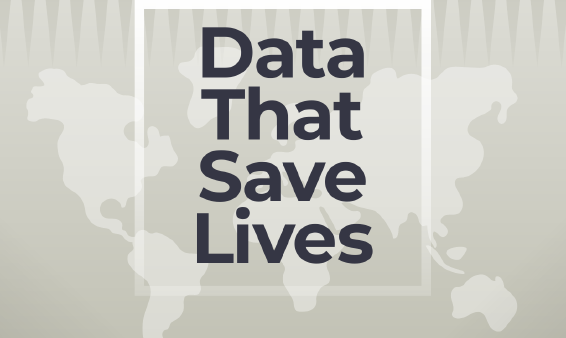
#### **チャレンジの目的**

このチャレンジでは、EM-DAT災害データセットのデータを使ってストーリーを伝える.ipynbファイルを作成します。あなたの独自の視点からデータを分析し、有意義な洞察を導き出し、それを簡潔かつ効果的に視覚的に表現することが目標です。Be creative!

#### **データセットの概要**
https://www.emdat.be/

#### **提出物**

1. **提出物の形式**:
   - Jupyter Notebook (.ipynb) ファイル
   - Markdownセルを使用して、分析の説明、洞察、結論を含むストーリーを伝える。ブログ投稿のように構成すると良いでしょう！
   - コードセルを使用して、データの読み込み、前処理、分析、可視化を行う。
   - Notebook内で生成されたグラフやチャートを含める。
   - 必ず自分のやっていること、感想、学んだことを説明する。

2. **提出方法**:
   - GitHubリポジトリにNotebookをコミットする
   - UNIPAにNotebookのリンクを提出する

3. **締め切り**:
   - 次回のクラス開始前までに提出すること



#### **要件**
1. **フォーカスエリア**:
   - 興味に基づいて**フォーカスエリア**を選択する（例: 災害の種類、死者数、人への影響、地域分析、または時間的トレンド）。

2. **分析**:
   - 計算やデータ探索を通じて、少なくとも**3つの重要な洞察**を提供する。
   - 興味深い統計（種類・地域別の数とか）、トレンド、または異常値を特定する。

3. **可視化**:
   - 分析をサポートする**少なくとも2つの可視化**を作成する。
   - 関連性があり解釈しやすいチャート（例: 棒グラフ、折れ線グラフ、散布図、ヒートマップ）を使用する。

4. **サマリー**:
   - 発見した内容を簡潔にまとめ、その重要性を説明する。



## まずはデータの読み込みから

UNIPAからデータCSVファイルemdata.csvを取得し、このノートブックと同じフォルダに配置してください。次に、以下のコードを実行してデータをpandas DataFrameに読み込みます。



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [2]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## ここからはあなたの分析

以下はあくまでも例：

In [3]:
# Ranking by total deaths
death_ranking = emdat.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("Top 10 countries by total deaths from disasters:")
print(death_ranking.head(10))

Top 10 countries by total deaths from disasters:
Country
China           12522453.0
India            9138244.0
Soviet Union     3857423.0
Bangladesh       2994475.0
Ethiopia          417252.0
Haiti             253200.0
Indonesia         243370.0
Japan             239761.0
Uganda            207817.0
Niger             196580.0
Name: Total Deaths, dtype: float64


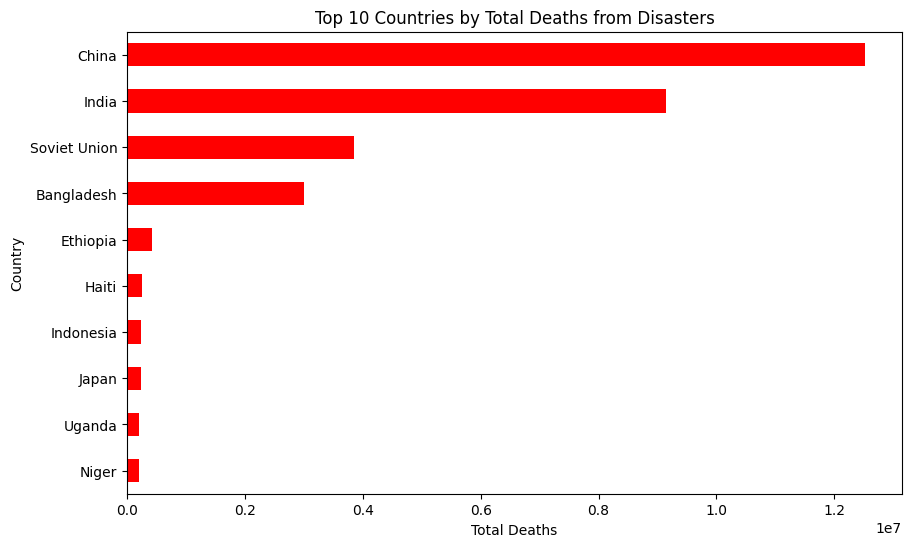

In [4]:
# ranking of total deaths in horizontal bar chart, top 10 countries, highest first 
top_10_deaths = death_ranking.head(10)
plt.figure(figsize=(10, 6))
top_10_deaths.plot(kind='barh', color='red')
plt.xlabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.gca().invert_yaxis()  # Highest first
plt.show()

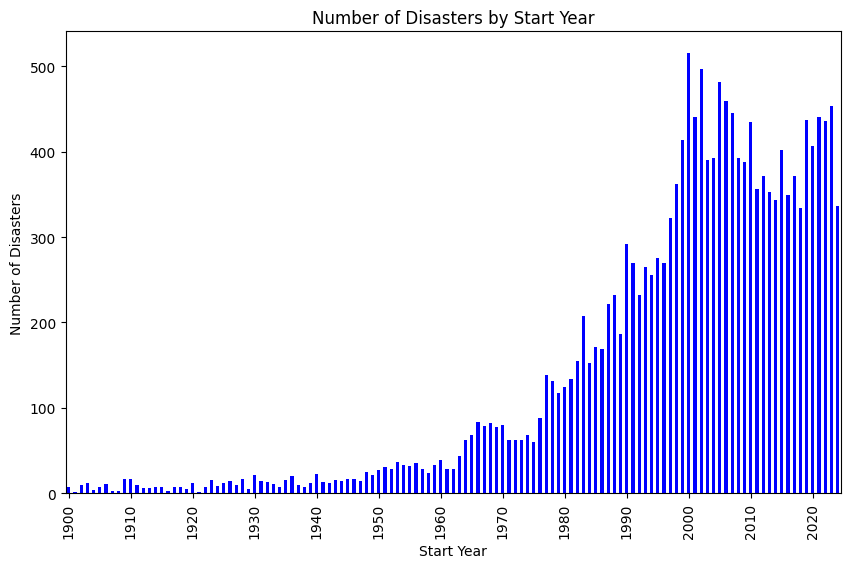

In [5]:
# disasters by year
disasters_by_year = emdat.groupby('Start Year').size()
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='bar', color='blue')

# label only every 10 years on x-axis
plt.xticks(ticks=range(0, len(disasters_by_year), 10), labels=disasters_by_year.index[::10])   
plt.xlabel('Start Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Start Year')
plt.show()

# ここから私の分析


どの災害が人の命を一番奪っているのでしょうか？

【死者数トップ10の災害】
           Country  Start Year Disaster Type  Total Deaths
287          China        1931         Flood     3700000.0
255          China        1928       Drought     3000000.0
134   Soviet Union        1917      Epidemic     2500000.0
155          India        1920      Epidemic     2000000.0
847          China        1959         Flood     2000000.0
457     Bangladesh        1943       Drought     1900000.0
1147         India        1965       Drought     1500000.0
441          India        1942       Drought     1500000.0
60           China        1909      Epidemic     1500000.0
54           India        1907      Epidemic     1300000.0


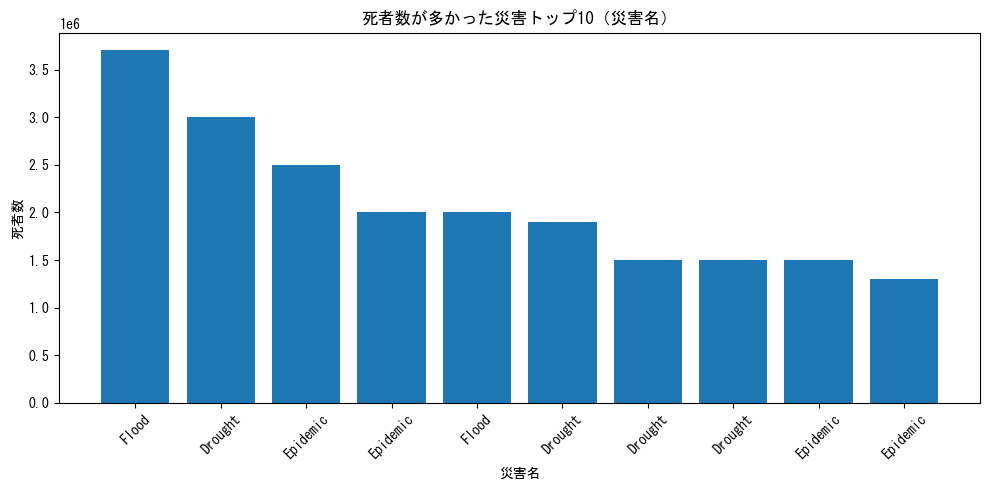

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 死者数トップ10
df_deaths = df[df["Total Deaths"].notnull()]
deaths_top = df_deaths.sort_values("Total Deaths", ascending=False).head(10)

print("【死者数トップ10の災害】")
print(deaths_top[["Country", "Start Year", "Disaster Type", "Total Deaths"]])

plt.figure(figsize=(10,5))
plt.bar(
    range(10),
    deaths_top["Total Deaths"]
)

# ▼ここを「災害名（Disaster Type）」に変更
plt.xticks(range(10), deaths_top["Disaster Type"], rotation=45)

plt.title("死者数が多かった災害トップ10（災害名）")
plt.xlabel("災害名")
plt.ylabel("死者数")
plt.tight_layout()
plt.show()


【年ごとの災害件数トレンド】
Start Year
1900     7
1901     2
1902    10
1903    12
1904     4
Name: count, dtype: int64


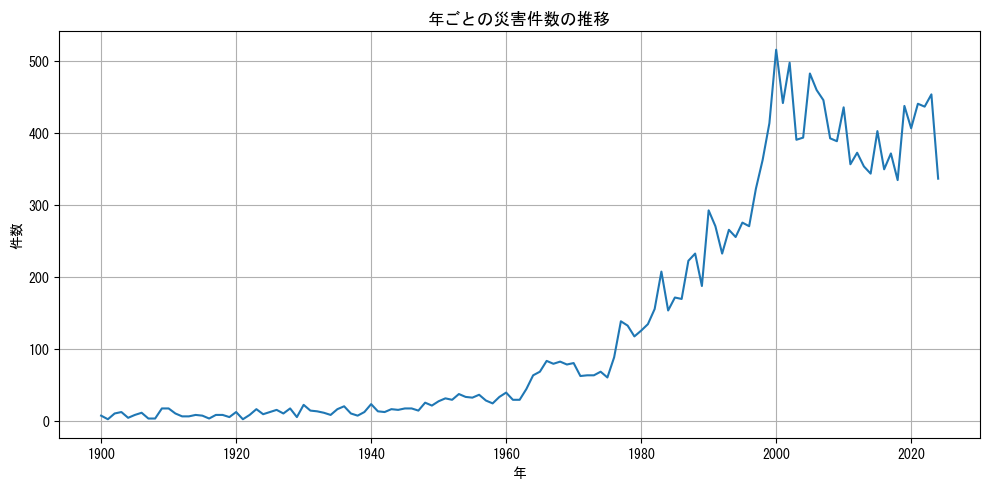

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 年ごとの件数
year_counts = df["Start Year"].value_counts().sort_index()

print("【年ごとの災害件数トレンド】")
print(year_counts.head())

plt.figure(figsize=(10,5))
year_counts.plot(kind="line")
plt.title("年ごとの災害件数の推移")
plt.xlabel("年")
plt.ylabel("件数")
plt.grid(True)
plt.tight_layout()
plt.show()


【国別の災害件数トップ10】
Country
United States of America    1172
China                       1023
India                        785
Philippines                  710
Indonesia                    636
Japan                        391
Bangladesh                   368
Mexico                       311
Brazil                       289
Viet Nam                     272
Name: count, dtype: int64


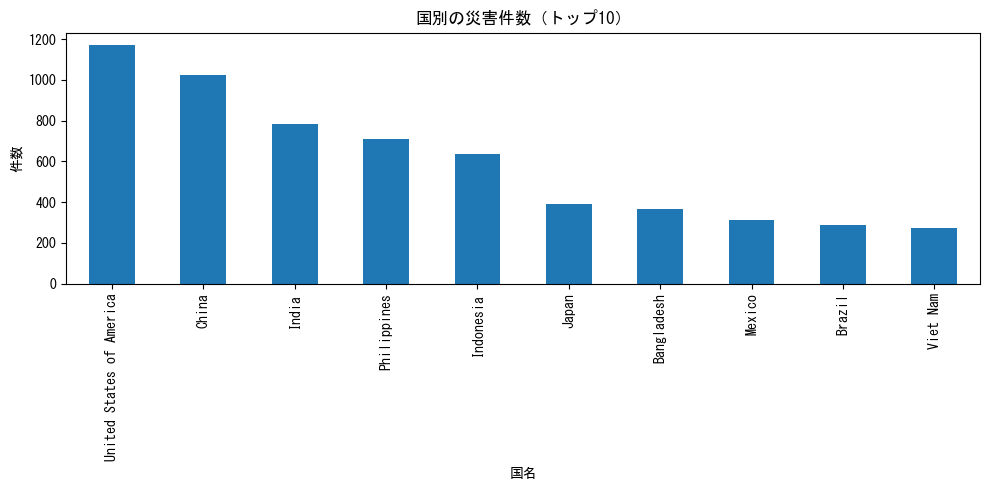

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")

# 国別件数
country_counts = df["Country"].value_counts()

print("【国別の災害件数トップ10】")
print(country_counts.head(10))

plt.figure(figsize=(10,5))
country_counts.head(10).plot(kind="bar")
plt.title("国別の災害件数（トップ10）")
plt.xlabel("国名")
plt.ylabel("件数")
plt.tight_layout()
plt.show()


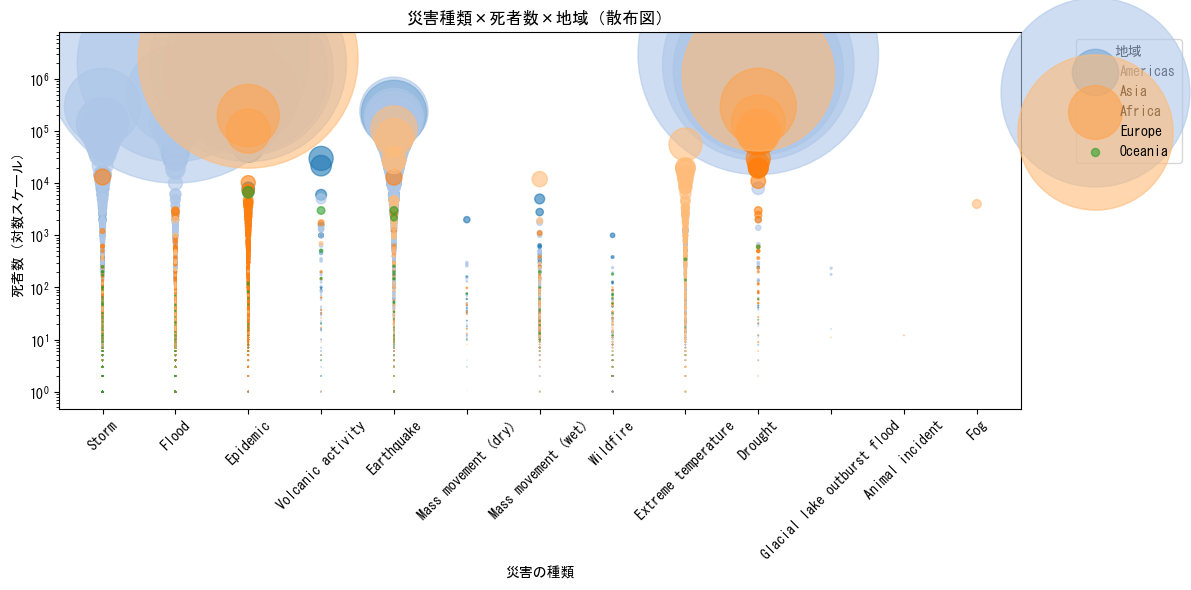

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'MS Gothic'

# データ読み込み
df = pd.read_csv("emdat.csv")

# Total Deaths があるデータだけ
df_deaths = df[df["Total Deaths"].notnull()]

# 散布図作成
plt.figure(figsize=(12,6))

# 地域ごとに色分け
regions = df_deaths["Region"].unique()
colors = plt.cm.tab20.colors  # カラーマップ
region_color_map = {region: colors[i % len(colors)] for i, region in enumerate(regions)}

# 各災害ごとの散布点を作成
for region in regions:
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],  # X軸：災害種類
        subset["Total Deaths"],   # Y軸：死者数
        s=subset["Total Deaths"]/100,  # 点の大きさを死者数で表現
        color=region_color_map[region],
        alpha=0.6,
        label=region
    )

plt.xticks(rotation=45)
plt.yscale('log')  # 死者数の幅が大きい場合、対数表示で見やすく
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")
plt.legend(title="地域", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


凡例の円が大きすぎるので変更しましょう！

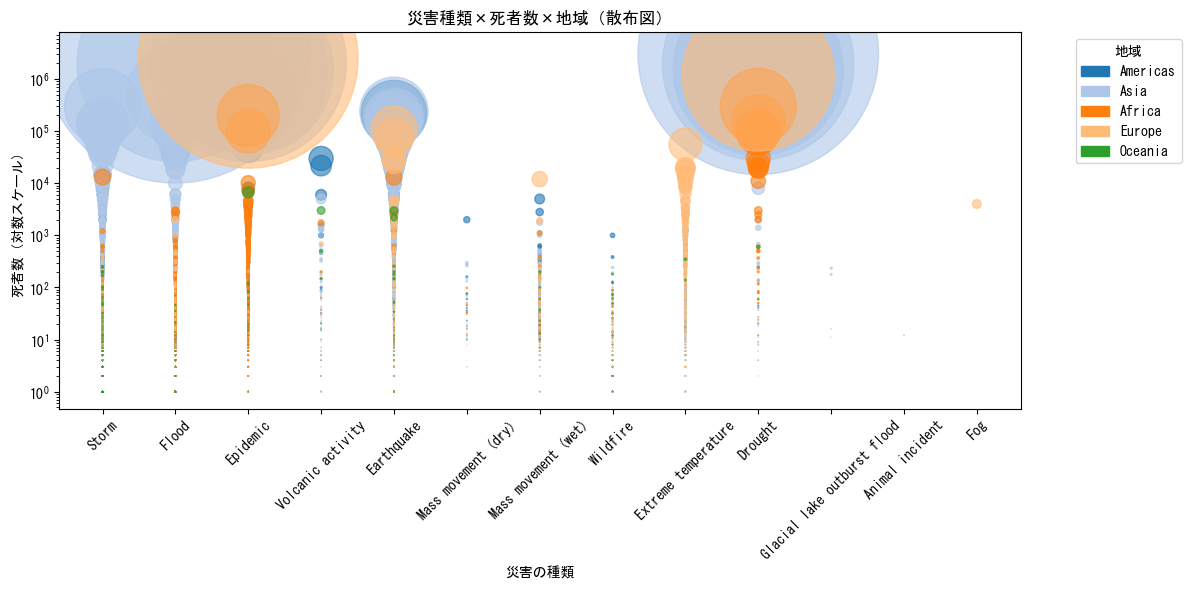

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")
df_deaths = df[df["Total Deaths"].notnull()]

plt.figure(figsize=(12,6))

# 地域ごとに色分け
regions = df_deaths["Region"].unique()
colors = plt.cm.tab20.colors
region_color_map = {region: colors[i % len(colors)] for i, region in enumerate(regions)}

# 散布図作成（点の大きさは死者数で可変）
for region in regions:
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],
        subset["Total Deaths"],
        s=subset["Total Deaths"]/100,  # 点の大きさは死者数
        color=region_color_map[region],
        alpha=0.6
    )

plt.xticks(rotation=45)
plt.yscale('log')
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")

# ===== 凡例を作る（円の大きさを統一） =====
handles = [mpatches.Patch(color=region_color_map[region], label=region) for region in regions]
plt.legend(handles=handles, title="地域", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


円の色が薄く分かりずらいですね…

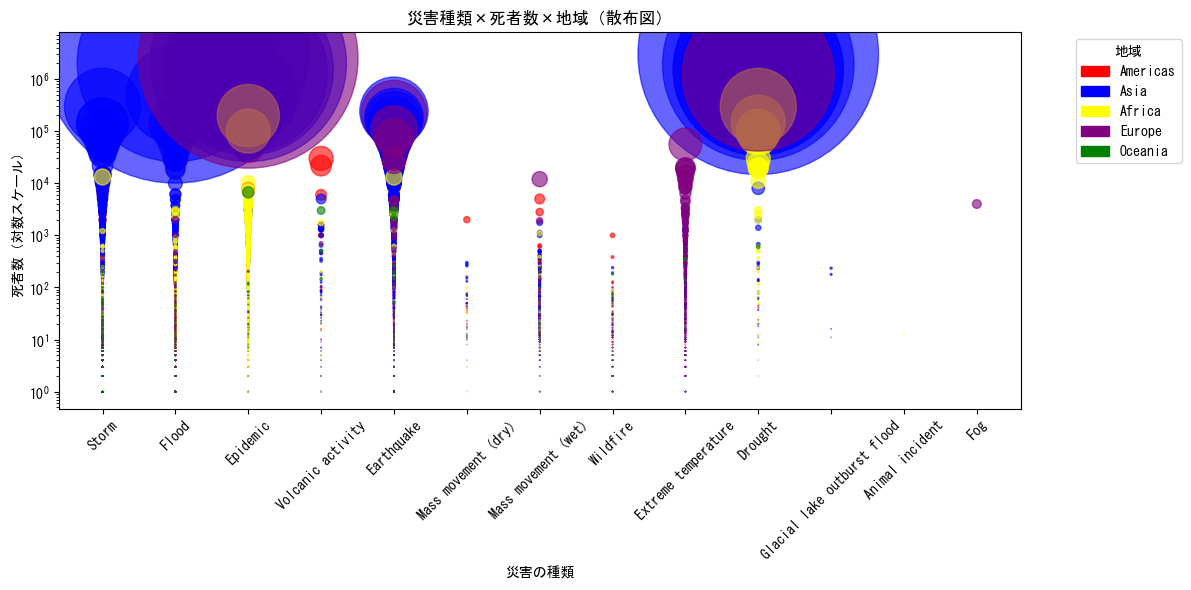

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'MS Gothic'

df = pd.read_csv("emdat.csv")
df_deaths = df[df["Total Deaths"].notnull()]

plt.figure(figsize=(12,6))

# 地域ごとの色を固定
region_color_map = {
    "Americas": "red",
    "Asia": "blue",
    "Africa": "yellow",
    "Europe": "purple",
    "Oceania": "green"
}

# 散布図作成（点の大きさは死者数で可変）
for region, color in region_color_map.items():
    subset = df_deaths[df_deaths["Region"] == region]
    plt.scatter(
        subset["Disaster Type"],
        subset["Total Deaths"],
        s=subset["Total Deaths"]/100,  # 点の大きさは死者数
        color=color,
        alpha=0.6
    )

plt.xticks(rotation=45)
plt.yscale('log')
plt.title("災害種類×死者数×地域（散布図）")
plt.xlabel("災害の種類")
plt.ylabel("死者数（対数スケール）")

# ===== 凡例を作る（円の大きさは統一） =====
handles = [mpatches.Patch(color=color, label=region) for region, color in region_color_map.items()]
plt.legend(handles=handles, title="地域", bbox_to_anchor=(1.05,1), loc='upper left')

plt.tight_layout()
plt.show()


# おお

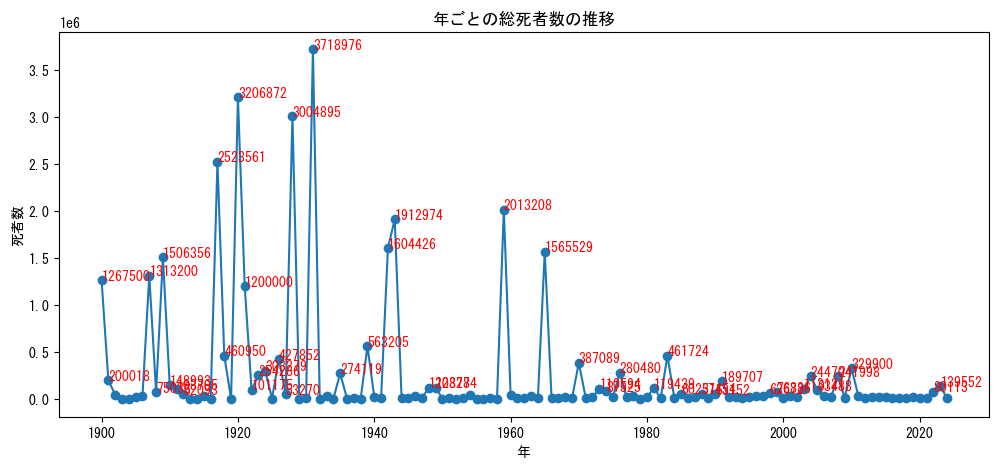

In [15]:
year_deaths = df.groupby("Start Year")["Total Deaths"].sum()
plt.figure(figsize=(12,5))
plt.plot(year_deaths.index, year_deaths.values, marker='o')
plt.title("年ごとの総死者数の推移")
plt.xlabel("年")
plt.ylabel("死者数")
# 異常値を赤で強調
for year, deaths in year_deaths.items():
    if deaths > 50000:  # 任意の閾値
        plt.text(year, deaths, str(int(deaths)), color='red')
plt.show()


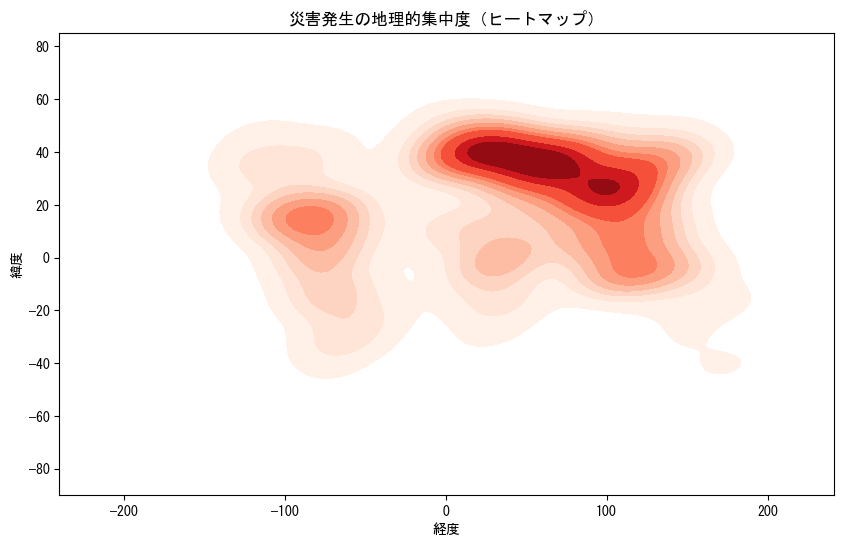

In [16]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(x=df["Longitude"], y=df["Latitude"], fill=True, cmap="Reds")
plt.title("災害発生の地理的集中度（ヒートマップ）")
plt.xlabel("経度")
plt.ylabel("緯度")
plt.show()
